## XGBoost Assignment
In this assignment students need to predict whether a person makes over 50K per year or not from classic adult dataset using XGBoost. The description of the dataset is as follows:

Data Set Information:

Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the
following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0))

Attribute Information:

Listing of attributes: >50K, <=50K.

age: continuous.

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov,
Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school,
Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th,
Doctorate, 5th-6th, Preschool.

education-num: continuous.

marital-status: Married-civ-spouse, Divorced, Never-married,
Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

Following is the code to load required libraries and data:

import numpy as np

import pandas as pd

train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)

test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test' , skiprows = 1, header = None)

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation','relationship', 'race', 'sex', capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'wage_class']

train_set.columns = col_labels


test_set.columns = col_labels

In [1]:
# Load the packages and the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix, plot_confusion_matrix, classification_report, roc_curve, auc
#from xgboost.sklearn import XGBClassifier
from xgboost import XGBClassifier

train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)

test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test' , skiprows = 1, header = None)

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation','relationship',
              'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'wage_class']

train_set.columns = col_labels

test_set.columns = col_labels

In [2]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


## EDA

In [4]:
train_set['wage_class'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [5]:
test_set['wage_class'].unique()

array([' <=50K.', ' >50K.'], dtype=object)

wage_class labels in test dataset have an extra "." (dot). Let us remove this extra dot and make these labels same as train dataset.

In [6]:
test_set['wage_class'].value_counts()

 <=50K.    12435
 >50K.      3846
Name: wage_class, dtype: int64

In [7]:
test_set.loc[test_set['wage_class']==' <=50K.', 'wage_class'] = ' <=50K'
test_set.loc[test_set['wage_class']==' >50K.', 'wage_class'] = ' >50K'
test_set['wage_class'].value_counts()

 <=50K    12435
 >50K      3846
Name: wage_class, dtype: int64

In [8]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  wage_class      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   workclass       16281 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   education       16281 non-null  object
 4   education_num   16281 non-null  int64 
 5   marital_status  16281 non-null  object
 6   occupation      16281 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   sex             16281 non-null  object
 10  capital_gain    16281 non-null  int64 
 11  capital_loss    16281 non-null  int64 
 12  hours_per_week  16281 non-null  int64 
 13  native_country  16281 non-null  object
 14  wage_class      16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [10]:
dataset = pd.concat([train_set, test_set])
dataset.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education_num   48842 non-null  int64 
 5   marital_status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital_gain    48842 non-null  int64 
 11  capital_loss    48842 non-null  int64 
 12  hours_per_week  48842 non-null  int64 
 13  native_country  48842 non-null  object
 14  wage_class      48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


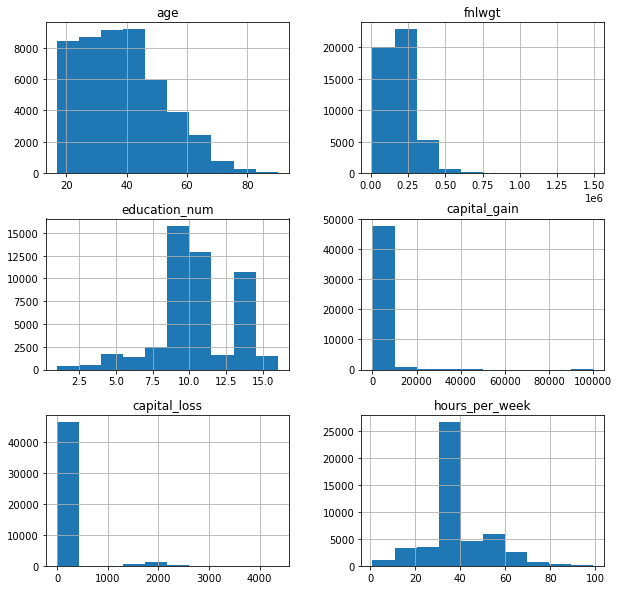

In [12]:
dataset.hist(figsize=(10,10))
plt.show()

## Handling Rare Categorical Feature

We will group categorical variable's values that are present less than 2% of the total number of observations.

In [13]:
# Examine the categorical features
categorical_features = [feature for feature in col_labels if dataset[feature].dtypes == 'O']
for feature in categorical_features:
    print('_'*10, feature, end=" ",)
    print('_'*10)
    print(dataset[feature].value_counts())

__________ workclass __________
 Private             33906
 Self-emp-not-inc     3862
 Local-gov            3136
 ?                    2799
 State-gov            1981
 Self-emp-inc         1695
 Federal-gov          1432
 Without-pay            21
 Never-worked           10
Name: workclass, dtype: int64
__________ education __________
 HS-grad         15784
 Some-college    10878
 Bachelors        8025
 Masters          2657
 Assoc-voc        2061
 11th             1812
 Assoc-acdm       1601
 10th             1389
 7th-8th           955
 Prof-school       834
 9th               756
 12th              657
 Doctorate         594
 5th-6th           509
 1st-4th           247
 Preschool          83
Name: education, dtype: int64
__________ marital_status __________
 Married-civ-spouse       22379
 Never-married            16117
 Divorced                  6633
 Separated                 1530
 Widowed                   1518
 Married-spouse-absent      628
 Married-AF-spouse           37
Name

In [14]:
for feature in categorical_features:
    temp = dataset.groupby(feature)[feature].count()/len(dataset)
    temp_df = temp[temp > 0.02].index
    dataset[feature] = np.where(dataset[feature].isin(temp_df), dataset[feature], ' Rare-Value')

# Examine the categorical features
for feature in categorical_features:
    print('_'*10, feature, end=" ",)
    print('_'*10)
    print(dataset[feature].value_counts())

__________ workclass __________
 Private             33906
 Self-emp-not-inc     3862
 Local-gov            3136
 ?                    2799
 State-gov            1981
 Self-emp-inc         1695
 Federal-gov          1432
 Rare-Value             31
Name: workclass, dtype: int64
__________ education __________
 HS-grad         15784
 Some-college    10878
 Bachelors        8025
 Rare-Value       4635
 Masters          2657
 Assoc-voc        2061
 11th             1812
 Assoc-acdm       1601
 10th             1389
Name: education, dtype: int64
__________ marital_status __________
 Married-civ-spouse    22379
 Never-married         16117
 Divorced               6633
 Separated              1530
 Widowed                1518
 Rare-Value              665
Name: marital_status, dtype: int64
__________ occupation __________
 Prof-specialty       6172
 Craft-repair         6112
 Exec-managerial      6086
 Adm-clerical         5611
 Sales                5504
 Other-service        4923
 Machine-op-

#### Applying One-Hot encoding to all the categorical features

In [15]:
# One-Hot encoding
df1 = pd.get_dummies(dataset[categorical_features[:-1]], drop_first=True)
df1.head()

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Rare-Value,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,education_ 11th,education_ Assoc-acdm,education_ Assoc-voc,...,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Black,race_ Rare-Value,race_ White,sex_ Male,native_country_ United-States
0,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,1,1
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
2,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,1
3,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


In [16]:
df2 = dataset.drop(categorical_features, axis=1)
df2.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [17]:
# Dependent Variable
y = dataset['wage_class']
y.shape

(48842,)

In [18]:
# Independent Variable
X = pd.concat([df1, df2], axis=1)
X.head()

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Rare-Value,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,education_ 11th,education_ Assoc-acdm,education_ Assoc-voc,...,race_ Rare-Value,race_ White,sex_ Male,native_country_ United-States,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0,0,0,0,0,0,1,0,0,0,...,0,1,1,1,39,77516,13,2174,0,40
1,0,0,0,0,0,1,0,0,0,0,...,0,1,1,1,50,83311,13,0,0,13
2,0,0,1,0,0,0,0,0,0,0,...,0,1,1,1,38,215646,9,0,0,40
3,0,0,1,0,0,0,0,1,0,0,...,0,0,1,1,53,234721,7,0,0,40
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,28,338409,13,0,0,40


In [19]:
X.shape

(48842, 49)

#### Using LabelEncoder over the target variable

In [20]:
# Encode target labels with values 0 and 1.
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_

array([' <=50K', ' >50K'], dtype=object)

In [21]:
y

array([0, 0, 0, ..., 0, 0, 1])

## Train Test Split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((36631, 49), (12211, 49), (36631,), (12211,))

## Training and Predicting

In [23]:
# fit model on training data
X_train = np.ascontiguousarray(X_train)
X_test = np.ascontiguousarray(X_test)
model = XGBClassifier(objective='binary:logistic', use_label_encoder=False)
model.fit(X_train, y_train)

[19:54:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [24]:
# checking training accuracy
y_pred = model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
accuracy

0.9018863803881958

In [25]:
# checking initial test accuracy
y_test_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred)
accuracy

0.8731471623945622

In [26]:
# Now to increase the accuracy of the model, we'll do hyperparameter tuning using grid search

param_grid = {
    'learning_rate' : [0.5, 0.1, 0.05],
    'max_depth' : [3, 4, 5],
    'n_estimators' : [225, 250, 275]
}

grid = GridSearchCV(XGBClassifier(objective='binary:logistic', use_label_encoder=False), param_grid, n_jobs=-1, verbose=3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[20:24:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, use_label_encoder=

In [27]:
# To  find the parameters giving maximum accuracy
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 275}

In [28]:
# Create new model using the best parameters and check test accuracy
new_model = XGBClassifier(learning_rate= 0.1, max_depth= 4, n_estimators= 275, use_label_encoder=False)
new_model.fit(X_train, y_train)
y_pred_new = new_model.predict(X_test)
accuracy_new = accuracy_score(y_test, y_pred_new)
accuracy_new

[20:24:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8745393497666039

Model accuracy improved after hyperparameter tuning

In [29]:
# Now to increase the accuracy of the model, we'll do hyperparameter tuning using grid search

param_grid = {
    'learning_rate' : [0.5, 0.1, 0.05],
    'max_depth' : [3, 4, 5],
    'n_estimators' : [250, 275, 300]
}

grid = GridSearchCV(XGBClassifier(objective='binary:logistic', use_label_encoder=False), param_grid, n_jobs=-1, verbose=3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[20:58:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, use_label_encoder=

In [30]:
# To  find the parameters giving maximum accuracy
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 275}

## Classification report
We can check precision, recall, f1-score using classification report

In [31]:
print(classification_report(y_test, y_pred_new))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      9267
           1       0.79      0.65      0.72      2944

    accuracy                           0.87     12211
   macro avg       0.84      0.80      0.82     12211
weighted avg       0.87      0.87      0.87     12211



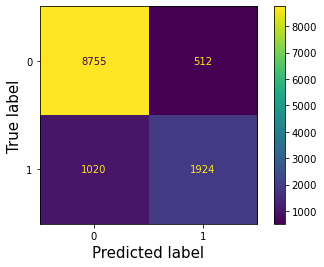

In [32]:
plot_confusion_matrix(new_model, X_test, y_test)
plt.xlabel("Predicted label",fontsize=15)
plt.ylabel("True label",fontsize=15)
plt.show()

In [33]:
conf_mat = confusion_matrix(y_test, y_pred_new)
conf_mat

array([[8755,  512],
       [1020, 1924]], dtype=int64)

In [34]:
true_negative = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_positive = conf_mat[1][1]

In [35]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive + false_positive + false_negative + true_negative)
Accuracy

0.8745393497666039

In [36]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.7898193760262726

In [37]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.6535326086956522

In [38]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.7152416356877325

## ROC Curve

In [39]:
## Get data to plot ROC Curve
fp, tp, th = roc_curve(y_test, y_pred_new)
roc_auc = auc(fp, tp)
fp, tp, th, roc_auc

(array([0.        , 0.05524981, 1.        ]),
 array([0.        , 0.65353261, 1.        ]),
 array([2, 1, 0]),
 0.7991413987688902)

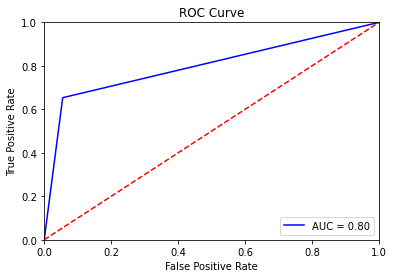

In [40]:
## Plot ROC Curve
plt.title('ROC Curve')
plt.plot(fp, tp, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()